In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import cv2
import seaborn as sns


In [2]:
# The mnist.images contains digit images with 8x8 matrix.
# mnist.data contains flattened data where each digit is represented by 64 features
# load the MNIST digits dataset
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

# lets print the first digit as 8x8 matrix
print("First digit as an 8x8 matrix:")
print(X[0].reshape((8, 8)))

First digit as an 8x8 matrix:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
# split dataset into training and test set
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.10, random_state=1)

# show the sizes of each data split
print("number of train samples: {}".format(len(X_train)))
print("number of test samples:: {}".format(len(X_test)))

number of train samples: 1617
number of test samples:: 180


In [4]:
#select the model
model = Perceptron ()

#train the model
model.fit(X_train, y_train)

#test and analyse the model
fx_test = model.predict(X_test)

print("EVALUATION ON TEST DATA\n")
accuracy = accuracy_score(y_test, fx_test)
print("Accuracy is %.2f on test data\n" % accuracy)

EVALUATION ON TEST DATA

Accuracy is 0.94 on test data



In [5]:
cr = classification_report(y_test, fx_test)
print("Classification Report:\n\n{}" .format(cr))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.86      0.95      0.90        19
           2       1.00      1.00      1.00        21
           3       0.95      0.95      0.95        22
           4       0.94      0.94      0.94        18
           5       0.88      0.88      0.88        17
           6       1.00      1.00      1.00        16
           7       1.00      0.90      0.95        21
           8       0.82      0.93      0.88        15
           9       0.89      0.73      0.80        11

    accuracy                           0.94       180
   macro avg       0.94      0.93      0.93       180
weighted avg       0.94      0.94      0.94       180



Confusion matrix


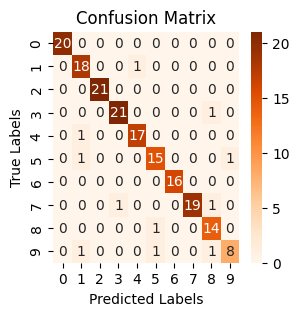

In [6]:
print ("Confusion matrix")
cm = confusion_matrix(y_test, fx_test)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=mnist.target_names, yticklabels=mnist.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

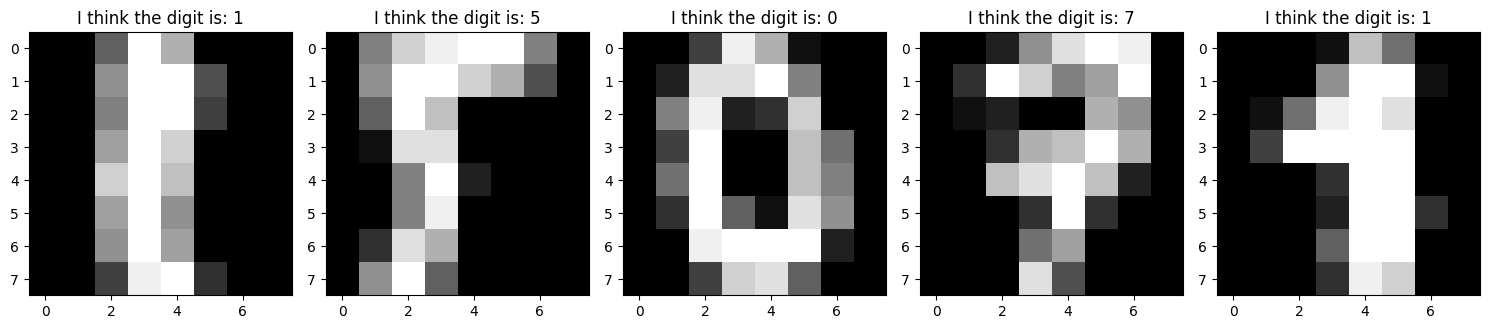

In [7]:
# Figure to hold subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns
axes = axes.flatten()
# visualize the first 5 digits and annotate them
for i in range(5):
         label = model.predict([X_test[i]])
         image = X_test[i].reshape((8,8))
         axes[i].imshow(image, cmap='gray')  # Images'll be shown in gray scale
         axes[i].set_title(f"I think the digit is: {label[0]}", fontsize=12)  
         cv2.waitKey(0)
# Show the plot
plt.tight_layout()
plt.show()